In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import UnivariateSpline

In [2]:
# Define DIN font
plt.rcParams["font.family"] = "DIN Alternate"

# define standard figure size for plots
figsize = (10, 6)

### Operator prevalence depending on scale

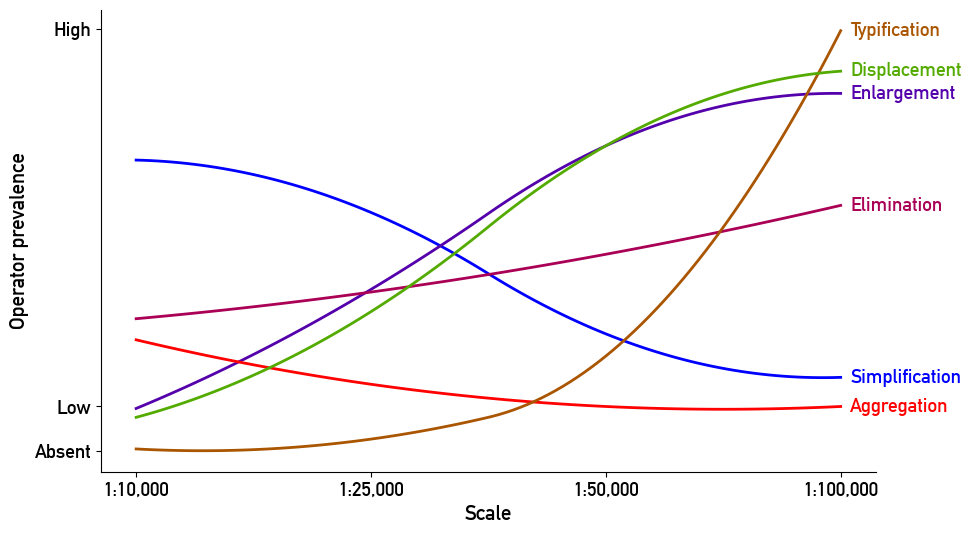

In [3]:
path = "../../Figures/Generalization/Distribution"
distribution = pd.read_csv(f"{path}/operator_distribution.csv")

# Define the scale categories
scales = ["1:10,000", "1:25,000", "1:50,000", "1:100,000"]
x_numeric = np.array([1, 2, 3, 4])  # Numeric x values corresponding to the scale categories

# Set up the plot
fig, ax = plt.subplots(figsize=figsize)
colors = plt.get_cmap("brg") # magma, brg

# Number of operators
num_operators = len(distribution)

# Define a finer x-axis for smoother transitions
x_fine = np.linspace(x_numeric.min(), x_numeric.max(), num=100)

# Find maximum y-value across all operators
max_y_value = 0

# Plot a smooth line for each operator
for index, row in distribution.iterrows():
    y_values = row[scales].astype(float).values
    
    # Check and update the maximum y-value found
    if max(y_values) > max_y_value:
        max_y_value = max(y_values)
    
    # Spline interpolation
    spline = UnivariateSpline(x_numeric, y_values, s=None, k=2)
    y_smooth = spline(x_fine)
    color = colors(index / num_operators)
    
    # Plot line
    ax.plot(x_fine, y_smooth, color=color, linewidth=2)
    
    # Annotate the last point of each line
    ax.annotate(row["operator"], xy=(x_fine[-1], y_smooth[-1]), xytext=(7, 0),
                textcoords="offset points", ha="left", va="center", color=color, fontsize=14, fontweight="bold")

# Customize the y-axis to have qualitative labels
ax.set_yticks([0, 10, max_y_value])  # 'Low' at zero, 'High' at the maximum value
ax.set_yticklabels(["Absent", "Low", "High"])

# Add labels and title
ax.set_ylabel("Operator prevalence", fontsize=15)
ax.set_xlabel("Scale", fontsize=15)
ax.set_xticks(x_numeric)
ax.set_xticklabels(scales)

ax.tick_params(axis="both", which="major", labelsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

fig.savefig(f"{path}/operator_prevalence.png", bbox_inches="tight")